# Modeling Notebook Structure
We are going to compare three models and then we will choose one best model. 

Model 1: Hybrid Model (Collaborative + Content-based using TF-IDF).
We'll use a K-Nearest Neighbors (KNN) approach that blends collaborative filtering (user-item ratings) with TF-IDF genre similarity.

Model 2: Deep Learning

## Model 1: Hybrid Recommender
## Model 2: Deep Learning (Keras)
## Model Comparison and Results



In [1]:
# MODEL 1: Hybrid Model with TF-IDF + Collaborative Filtering
# Step 1: Import Libraries
from scipy.sparse import load_npz
import pandas as pd
import joblib


In [3]:
#Step: 1 Load Data and Features
# Load TF-IDF matrix

# Step 1: Load TF-IDF matrix
tfidf_matrix = load_npz(
    r"C:\Users\vidus\OneDrive\Documents\SpringBoard\Projects\CapstoneThree_MovieRecommedationSystem\data\processed\tfidf_sparse_genres.npz"
)

# Step 2: Load TF-IDF feature names
tfidf_features = joblib.load(
    r"C:\Users\vidus\OneDrive\Documents\SpringBoard\Projects\CapstoneThree_MovieRecommedationSystem\data\processed\tfidf_feature_names.pkl"
)

# Step 3: Load metadata CSV
df = pd.read_csv(
    r"C:\Users\vidus\OneDrive\Documents\SpringBoard\Projects\CapstoneThree_MovieRecommedationSystem\data\processed\df_metadata_only.csv"
)

# Preview data
print(df.shape)
df.head()


(19080406, 49)


,userId,movieId,rating,timestamp,year_x,title,genres_x,year_y,genres_y,(no genres listed),...,Film-Noir.1,Horror.1,IMAX.1,Musical.1,Mystery.1,Romance.1,Sci-Fi.1,Thriller.1,War.1,Western.1
0,1,2,-0.171527,NaN,NaN,Jumanji (1995),Adventure|Children|Fantasy,1995.0,Adventure|Children|Fantasy,0,...,0,0,0,0,0,0,0,0,0,0
1,1,29,-0.171527,NaN,NaN,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995.0,Adventure|Drama|Fantasy|Mystery|Sci-Fi,0,...,0,0,0,0,1,0,1,0,0,0
2,1,32,-0.171527,NaN,NaN,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995.0,Mystery|Sci-Fi|Thriller,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,-0.171527,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,Mystery|Thriller,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,-0.171527,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,Crime|Mystery|Thriller,0,...,0,0,0,0,1,0,0,1,0,0


In the next step, Creating a matrix where:

- Rows = users

- Columns = movies

- Values = ratings


In [5]:
print("Unique users:", df['userId'].nunique())
print("Unique movies:", df['movieId'].nunique())
print("Min movieId:", df['movieId'].min())
print("Max movieId:", df['movieId'].max())


Unique users: 138473
Unique movies: 26354
Min movieId: 1
Max movieId: 131262


In [7]:
# STEP 2: Filter for Top 10K Users and Top 5K Movies
# We’ll reduce the matrix size to avoid memory issues and make modeling efficient

# Filter top 10,000 most active users
top_users = df['userId'].value_counts().head(10000).index
df_small = df[df['userId'].isin(top_users)]

# Filter top 5,000 most rated movies
top_movies = df['movieId'].value_counts().head(5000).index
df_small = df_small[df_small['movieId'].isin(top_movies)]

# Check new shape
print("Filtered dataset shape:", df_small.shape)
print("Unique users:", df_small['userId'].nunique())
print("Unique movies:", df_small['movieId'].nunique())
df_small.head()


Filtered dataset shape: (6669676, 49)
Unique users: 10000
Unique movies: 5000


,userId,movieId,rating,timestamp,year_x,title,genres_x,year_y,genres_y,(no genres listed),...,Film-Noir.1,Horror.1,IMAX.1,Musical.1,Mystery.1,Romance.1,Sci-Fi.1,Thriller.1,War.1,Western.1
948,11,1,0.945554,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Adventure|Animation|Children|Comedy|Fantasy,0,...,0,0,0,0,0,0,0,0,0,0
949,11,10,-1.288608,NaN,NaN,GoldenEye (1995),Action|Adventure|Thriller,1995.0,Action|Adventure|Thriller,0,...,0,0,0,0,0,0,0,1,0,0
950,11,19,-0.171527,NaN,NaN,Ace Ventura: When Nature Calls (1995),Comedy,1995.0,Comedy,0,...,0,0,0,0,0,0,0,0,0,0
951,11,32,1.504095,NaN,NaN,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995.0,Mystery|Sci-Fi|Thriller,0,...,0,0,0,0,1,0,1,1,0,0
952,11,39,0.945554,NaN,NaN,Clueless (1995),Comedy|Romance,1995.0,Comedy|Romance,0,...,0,0,0,0,0,1,0,0,0,0


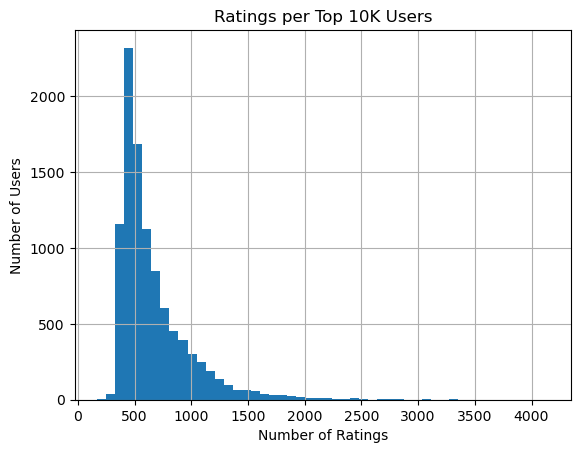

In [9]:
import matplotlib.pyplot as plt

# Plot distribution of number of ratings per user
df_small['userId'].value_counts().hist(bins=50)
plt.title("Ratings per Top 10K Users")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


### Ratings per Top 10K Users

To reduce memory usage and improve computational efficiency, I filtered the dataset to include only the top 10,000 most active users and the top 5,000 most rated movies.

The histogram below shows the distribution of the number of ratings submitted by the top 10,000 users. 

Most users rated between 300 to 1,000 movies, with a long tail of highly active users rating over 2,000 movies. This subset captures meaningful user behavior while keeping the dataset manageable for collaborative filtering.



In [11]:
# STEP 3: Create the user-item matrix for collaborative filtering.

# This matrix will have:

#  Rows = userId, Columns = movieId, and Values = rating
# Pivot the filtered data to create a user-item matrix
user_item_matrix = df_small.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  # Fill NaNs with 0s for cosine similarity

# Check matrix shape and preview
print("User-Item Matrix shape:", user_item_matrix.shape)
user_item_matrix.head()


User-Item Matrix shape: (10000, 5000)


movieId,1,2,3,4,5,6,7,8,9,10,...,112556,112623,112852,114180,115210,115569,115617,116797,116823,118696
userId,,,,,,,,,,,,,,,,,,,,,
11,0.945554,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,-1.288608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.387014,0.000000,0.000000,0.0,-1.847149,0.387014,-0.730068,0.0,0.0,-0.730068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.387014,-0.730068,0.000000,0.0,-0.730068,-0.730068,0.000000,0.0,0.0,0.387014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,1.504095,0.000000,0.000000,0.0,0.000000,0.945554,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.387014,-0.171527,-0.730068,0.0,0.000000,0.000000,-1.288608,0.0,0.0,0.387014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 3: Create the User-Item Matrix

To prepare for collaborative filtering, I constructed a user-item matrix using the filtered dataset of the top 10,000 active users and top 5,000 most-rated movies. In this matrix:

- **Rows** represent unique users (`userId`)
- **Columns** represent unique movies (`movieId`)
- **Values** are user ratings for those movies

Missing values (unrated items) are filled with 0s, which is suitable for cosine similarity computation. This matrix enables similarity-based comparisons between movie vectors.


In [13]:
# STEP 4: Compute collaborative similarity between movies using cosine similarity.
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose so each row is a movie vector instead of a user
movie_vectors = user_item_matrix.T

# Compute cosine similarity between movie vectors
collab_sim_matrix = cosine_similarity(movie_vectors)

# Wrap it in a DataFrame for easy lookup
collab_sim_df = pd.DataFrame(
    collab_sim_matrix,
    index=movie_vectors.index,
    columns=movie_vectors.index
)

# Preview
print("Collaborative Similarity Matrix shape:", collab_sim_df.shape)
collab_sim_df.iloc[:5, :5]



Collaborative Similarity Matrix shape: (5000, 5000)


movieId,1,2,3,4,5
movieId,,,,,
1,1.000000,0.009437,-0.024603,-0.048007,-0.029668
2,0.009437,1.000000,0.250332,0.105469,0.273339
3,-0.024603,0.250332,1.000000,0.121523,0.257860
4,-0.048007,0.105469,0.121523,1.000000,0.166728
5,-0.029668,0.273339,0.257860,0.166728,1.000000


### Step 4: Compute Collaborative Similarity Between Movies

Using the user-item matrix, I computed item-item (movie-to-movie) similarity using cosine similarity. This captures how similarly users rate different movies, forming the foundation for collaborative filtering.

- The matrix was transposed so that each row represents a movie's rating vector across users.
- Cosine similarity was computed between these movie vectors.
- The resulting matrix is 5,000 × 5,000 (top-rated movies), where each value indicates the similarity between two movies based on shared user rating behavior.


In [15]:
# Step 5: Align with TF-IDF and compute the hybrid recommendation matrix.
# Goal: Align movie IDs in both matrices (collab_sim_df and tfidf_matrix)

# - Rebuild TF-IDF matrix to match collaborative matrix movie order
# - Compute content-based similarity again (for aligned subset)
# - Blend both similarities using a weight alpha

# Step 5.1: Get common movie IDs and align order
# Step 5.1 - Get common movie IDs
common_movie_ids = sorted(set(collab_sim_df.index) & set(df_small['movieId'].unique()))

# Step 5.2 - Reindex collaborative similarity matrix to common movies
collab_sim_df = collab_sim_df.loc[common_movie_ids, common_movie_ids]


In [17]:
#  Step 5.3: Map movieId → row index in TF-IDF
# Step 5.3 - Create mapping from movieId to row index in TF-IDF matrix
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(df_small['movieId'].unique())}


In [19]:
# Step 5.4: Rebuild aligned TF-IDF matrix
from scipy.sparse import vstack

# Step 5.4 - Stack TF-IDF rows for aligned movieIds
aligned_tfidf_rows = [tfidf_matrix[movie_id_to_index[m]] for m in common_movie_ids if m in movie_id_to_index]
aligned_tfidf_matrix = vstack(aligned_tfidf_rows)


In [21]:
#  Step 5.5: Compute content similarity (for aligned matrix)
from sklearn.metrics.pairwise import cosine_similarity

# Step 5.5 - Compute cosine similarity on aligned TF-IDF
content_sim_matrix = cosine_similarity(aligned_tfidf_matrix)

# Wrap in DataFrame
content_sim_df = pd.DataFrame(
    content_sim_matrix,
    index=common_movie_ids,
    columns=common_movie_ids
)


In [23]:
# Step 5.6: Blend content + collaborative to get hybrid matrix
# Step 5.6 - Blend both matrices using alpha (weight for content-based)
alpha = 0.5  # try tuning this value (0.3, 0.7, etc.)

hybrid_sim_df = alpha * content_sim_df + (1 - alpha) * collab_sim_df

# Check result
hybrid_sim_df.iloc[:5, :5]


,1,2,3,4,5
1,1.000000,0.004719,-0.012301,-0.024003,-0.014834
2,0.004719,1.000000,0.125166,0.052735,0.436554
3,-0.012301,0.125166,1.000000,0.244135,0.128930
4,-0.024003,0.052735,0.244135,1.000000,0.083364
5,-0.014834,0.436554,0.128930,0.083364,1.000000


### Step 5: Build the Hybrid Similarity Matrix

To combine content-based and collaborative filtering, I aligned the movie IDs in both matrices and computed a weighted average of their cosine similarities. 
The final hybrid similarity matrix blends TF-IDF genre features and user rating behavior, enabling more balanced recommendations.


In [25]:
# Step 6: Build a recommendation function using the hybrid similarity matrix.
# STEP 6: Create Hybrid Recommendation Function

def get_hybrid_recommendations(movie_id, hybrid_sim_df, movie_df, top_n=10):
    """
    Given a movieId, return the top_n most similar movies using the hybrid similarity matrix.
    """
    if movie_id not in hybrid_sim_df.index:
        print("Movie ID not found in similarity matrix.")
        return pd.DataFrame()

    # Get top N similar movie IDs (excluding itself)
    sim_scores = hybrid_sim_df.loc[movie_id].sort_values(ascending=False)
    sim_scores = sim_scores.drop(labels=[movie_id], errors='ignore')
    top_movie_ids = sim_scores.head(top_n).index

    # Map movie IDs to titles
    return movie_df[movie_df['movieId'].isin(top_movie_ids)][['movieId', 'title']].drop_duplicates().set_index('movieId')


### Step 6: Generate Recommendations Using the Hybrid Similarity Matrix

I created a function to retrieve the top N most similar movies for a given `movieId` using the hybrid similarity matrix. 

It ranks movies based on the combined content and collaborative similarity scores and maps the results back to movie titles for interpretation.


In [27]:
# Get Top N Similar Movies (with scores only)

def get_top_similar_movies(movie_id, hybrid_sim_df, movie_df, top_n=10):
    """
    Return top N similar movies with similarity scores using the hybrid similarity matrix.
    """
    if movie_id not in hybrid_sim_df.index:
        print("Movie ID not found in similarity matrix.")
        return pd.DataFrame()

    # Get top N scores (excluding itself)
    sim_scores = hybrid_sim_df.loc[movie_id].sort_values(ascending=False)
    sim_scores = sim_scores.drop(labels=[movie_id], errors='ignore')
    top_sim_scores = sim_scores.head(top_n)

    # Map movie IDs to titles
    top_movies = movie_df[movie_df['movieId'].isin(top_sim_scores.index)][['movieId', 'title']].drop_duplicates()
    top_movies = top_movies.set_index('movieId').loc[top_sim_scores.index]
    top_movies['similarity'] = top_sim_scores.values

    return top_movies


In [29]:
# Plot the Similarity Scores:
def plot_similar_movies(top_movies, top_n=10):
    """
    Plot a horizontal bar chart of similarity scores for the top N similar movies.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.barh(top_movies['title'], top_movies['similarity'], color='skyblue')
    plt.xlabel("Similarity Score")
    plt.title("Top {} Similar Movies".format(top_n))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [31]:
top_movies = get_top_similar_movies(movie_id=1, hybrid_sim_df=hybrid_sim_df, movie_df=df, top_n=10)

# First output: table
top_movies

,title,similarity
260,Star Wars: Episode IV - A New Hope (1977),0.674862
54286,"Bourne Ultimatum, The (2007)",0.569248
223,Clerks (1994),0.568237
2959,Fight Club (1999),0.548316
6807,Monty Python's The Meaning of Life (1983),0.546520
1036,Die Hard (1988),0.545125
34072,"March of the Penguins (Marche de l'empereur, L...",0.544578
7502,Band of Brothers (2001),0.539680
7218,"Ox-Bow Incident, The (1943)",0.539435
1291,Indiana Jones and the Last Crusade (1989),0.535060


### Hybrid Recommendation Results for Movie ID 1

The above table displays the top 10 movies most similar to the selected movie based on a hybrid similarity matrix combining content and collaborative filtering.

#### Output 1: Similar Movies Table  
This table lists recommended titles along with their corresponding similarity scores.


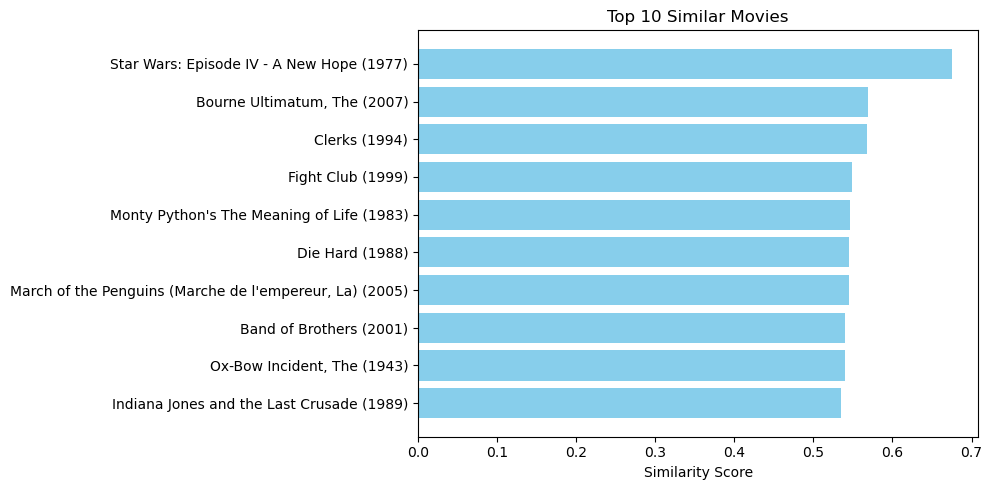

In [33]:
# Second output: chart
plot_similar_movies(top_movies, top_n=10)


#### Output 2: Similarity Score Chart  
The horizontal bar chart below visualizes the similarity scores for easier comparison and interpretation.

### Top 10 Hybrid Recommendations for Movie ID 1

Above are the top 10 most similar movies retrieved using the hybrid similarity matrix, which blends content-based and collaborative filtering.

- **Table**: Lists recommended movies along with their similarity scores.
- **Chart**: A horizontal bar graph visualizes the similarity scores for easier comparison.



### Model 2
## deep learning-based recommendation system

 using Keras where both userId and movieId are fed through embedding layers to predict ratings.

In [35]:
#Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.optimizers import Adam


In [37]:
import tensorflow as tf
print(tf.__version__)


2.18.1


In [39]:
# Step 2: Encode userId and movieId, then split data

# Load the ratings dataset
df_ratings = pd.read_csv("../data/processed/df_with_encoded_ids.csv")

# Encode userId and movieId
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df_ratings['userId_enc'] = user_encoder.fit_transform(df_ratings['userId'])
df_ratings['movieId_enc'] = movie_encoder.fit_transform(df_ratings['movieId'])

# Train-test split
X = df_ratings[['userId_enc', 'movieId_enc']]
y = df_ratings['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Step 3: Build and Train the Deep Learning Model (Keras)
# Number of unique users and movies
n_users = df_ratings['userId_enc'].nunique()
n_movies = df_ratings['movieId_enc'].nunique()

# User input
user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=n_users, output_dim=50)(user_input)
user_vec = Flatten()(user_embedding)

# Movie input
movie_input = Input(shape=(1,))
movie_embedding = Embedding(input_dim=n_movies, output_dim=50)(movie_input)
movie_vec = Flatten()(movie_embedding)

# Dot product or concatenate
concat = Concatenate()([user_vec, movie_vec])
dense = Dense(128, activation='relu')(concat)
output = Dense(1)(dense)

# Build the model
model = Model(inputs=[user_input, movie_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │  6,923,650 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │  1,317,700 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,254,407 (31.49 MB)

 Trainable params: 8,254,407 (31.49 MB)

 Non-trainable params: 0 (0.00 B)

### Model Summary

The deep learning recommendation model uses separate embedding layers for users and movies (embedding dimension = 50).  
- **Inputs:** User ID, Movie ID  
- **Architecture:**  
  - Two embedding layers (users: ~6.92M params, movies: ~1.31M params)  
  - Flatten layers to convert embeddings into vectors  
  - Concatenation of user and movie vectors  
  - Dense layer (128 units, ReLU activation)  
  - Output dense layer (1 unit for rating prediction)  
- **Total Parameters:** 8,254,487 (all trainable)  
- **Loss:** MSE, **Metric:** MAE  
- **Optimizer:** Adam (lr=0.001)  


Do NOT run below cell everytime, when Run the notebook. 

In [44]:
# Train the Model
# Train the model
history = model.fit(
    [X_train['userId_enc'], X_train['movieId_enc']],  # Inputs
    y_train,                                           # Target
    validation_data=(
        [X_test['userId_enc'], X_test['movieId_enc']],
        y_test
    ),
    epochs=5,
    batch_size=256,
    verbose=1
)


Epoch 1/5
59627/59627 ━━━━━━━━━━━━━━━━━━━━ 1315s 22ms/step - loss: 0.7175 - mae: 0.6715 - val_loss: 0.6451 - val_mae: 0.6330
Epoch 2/5
59627/59627 ━━━━━━━━━━━━━━━━━━━━ 1649s 27ms/step - loss: 0.6182 - mae: 0.6155 - val_loss: 0.6213 - val_mae: 0.6167
Epoch 3/5
59627/59627 ━━━━━━━━━━━━━━━━━━━━ 1589s 27ms/step - loss: 0.5767 - mae: 0.5905 - val_loss: 0.6123 - val_mae: 0.6101
Epoch 4/5
59627/59627 ━━━━━━━━━━━━━━━━━━━━ 1597s 26ms/step - loss: 0.5441 - mae: 0.5701 - val_loss: 0.6083 - val_mae: 0.6073
Epoch 5/5
59627/59627 ━━━━━━━━━━━━━━━━━━━━ 1585s 27ms/step - loss: 0.5158 - mae: 0.5518 - val_loss: 0.6094 - val_mae: 0.6086


# Save model
# Save model in Keras format (recommended for TF/Keras v3)
import os

# Create the folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save model in Keras format
model.save("models/deep_rec_model.keras")

# Save encoders
import joblib
joblib.dump(user_encoder, "models/user_encoder.joblib")
joblib.dump(movie_encoder, "models/movie_encoder.joblib")


In [51]:
# Save model outside the notebooks folder
from tensorflow import keras
import joblib
from pathlib import Path   # cross-platform paths

save_dir = Path("../models")   # one level up from /notebooks
model_path  = save_dir / "deep_rec_model.keras"
user_path   = save_dir / "user_encoder.joblib"
movie_path  = save_dir / "movie_encoder.joblib"

# Quick sanity checks
print("Looking in:", save_dir.resolve())
print("Found:", [p.name for p in save_dir.glob("*")])

if not model_path.exists():
    raise FileNotFoundError(f"Missing model: {model_path.resolve()}")

# Fast load for inference (no training, no optimizer state)
model = keras.models.load_model(model_path, compile=False)
user_encoder  = joblib.load(user_path)
movie_encoder = joblib.load(movie_path)

print("Model and encoders loaded. Ready to predict.")


Looking in: C:\Users\vidus\OneDrive\Documents\SpringBoard\Projects\CapstoneThree_MovieRecommedationSystem\models
Found: ['.ipynb_checkpoints', 'deep_rec_model.keras', 'movie_encoder.joblib', 'user_encoder.joblib']
Model and encoders loaded. Ready to predict.


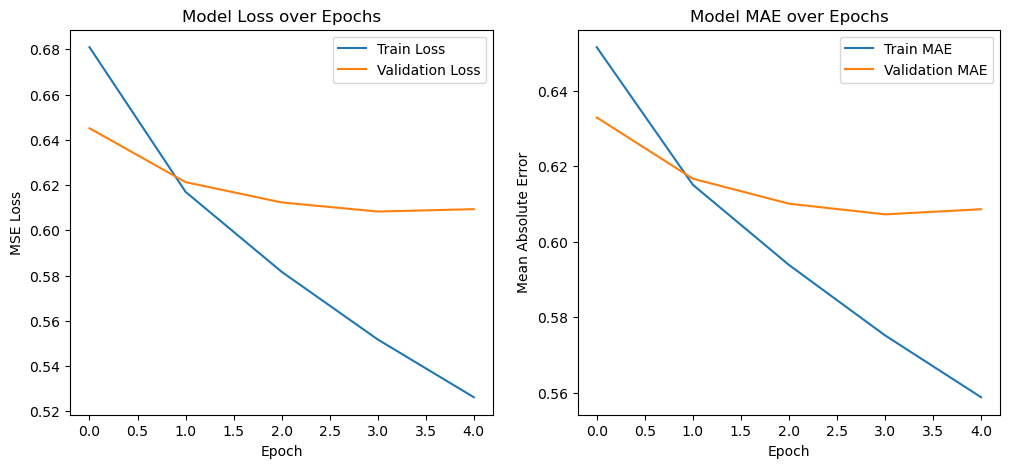

In [59]:
# Visualize the Loss & MAE over Epochs
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


### Training & Validation Performance

The training curves show a steady decrease in both MSE Loss and MAE across epochs.  
- **Loss**: Training loss decreases consistently, while validation loss plateaus after ~3 epochs, indicating good fit with minimal overfitting.  
- **MAE**: Training MAE improves steadily, and validation MAE remains stable, suggesting the model generalizes well to unseen data.


In [61]:
# Evaluate on the test set (MAE + RMSE)

from tensorflow.keras.optimizers import Adam

# Compile model before evaluation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Evaluate
from math import sqrt

test_loss, test_mae = model.evaluate(
    [X_test['userId_enc'], X_test['movieId_enc']],
    y_test,
    verbose=1
)

print(f"Test MSE: {test_loss:.4f}")
print(f"Test RMSE: {sqrt(test_loss):.4f}")
print(f"Test MAE: {test_mae:.4f}")



119253/119253 ━━━━━━━━━━━━━━━━━━━━ 193s 2ms/step - loss: 0.6099 - mae: 0.6101
Test MSE: 0.6103
Test RMSE: 0.7812
Test MAE: 0.6105


### Test Set Results
- **MSE:** 0.6103  
- **RMSE:** 0.7812  
- **MAE:** 0.6105  
On a 0.5–5 rating scale, the model is off by ~0.61 stars on average. Validation curves plateau ~epoch 3–4 → early stopping recommended.


In [64]:
#Save the metrics (so you don’t need to re-run evaluate)
from pathlib import Path
import json, math

save_dir = Path("../models")
metrics = {"test_mse": float(test_loss),
           "test_rmse": float(math.sqrt(test_loss)),
           "test_mae": float(test_mae)}
(save_dir / "eval_metrics.json").write_text(json.dumps(metrics, indent=2))
print("Saved:", save_dir / "eval_metrics.json")


Saved: ..\models\eval_metrics.json


In [66]:
# Load the Saved Model and Encoders
from tensorflow.keras.models import load_model

model = load_model("../models/deep_rec_model.keras", compile=False)  # don’t restore optimizer
model.compile(optimizer="adam", loss="mse", metrics=["mae"])      # recompile if you plan to train/evaluate


In [68]:
# Generate recommendations for a user
import pandas as pd
import numpy as np
import joblib

# Load data for mapping
df_ratings = pd.read_csv("../data/processed/df_with_encoded_ids.csv")
movies_df  = pd.read_csv("../data/processed/movies_processed.csv")[['movieId','title']].drop_duplicates()

# Load model & encoders (compile=False avoids the optimizer warning entirely)
from tensorflow.keras.models import load_model
model = load_model("../models/deep_rec_model.keras", compile=False)
user_encoder  = joblib.load("../models/user_encoder.joblib")
movie_encoder = joblib.load("../models/movie_encoder.joblib")


In [70]:
# Define a recommender function (excludes movies the user already rated)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def recommend_for_user(user_raw_id, df_ratings, movies_df, model, user_encoder, movie_encoder, top_n=10):
    # make sure user exists
    if user_raw_id not in df_ratings['userId'].values:
        raise ValueError("User not found in df_ratings")

    # encode user
    u_enc = user_encoder.transform([user_raw_id])[0]

    # movies already seen by user
    seen_movie_ids = set(df_ratings.loc[df_ratings['userId']==user_raw_id, 'movieId'].values)

    # candidate movies = all movies not seen
    all_movies_enc = df_ratings['movieId_enc'].unique()
    all_movies_raw = movie_encoder.inverse_transform(all_movies_enc)
    mask = ~np.isin(all_movies_raw, list(seen_movie_ids))
    cand_enc  = all_movies_enc[mask]
    cand_raw  = all_movies_raw[mask]

    # predict in batches
    user_vec = np.full(len(cand_enc), u_enc, dtype=np.int32)
    preds = model.predict([user_vec, cand_enc], batch_size=4096, verbose=0).flatten()

    # assemble and sort
    recs = (pd.DataFrame({'movieId': cand_raw, 'predicted_rating': preds})
            .merge(movies_df[['movieId','title']].drop_duplicates(), on='movieId', how='left')
            .sort_values('predicted_rating', ascending=False)
            .head(top_n))

    return recs[['movieId','title','predicted_rating']]


In [72]:
# Get a real user ID and generate Top-N
# pick a user with many ratings (so “seen” filtering is meaningful)
active_user = (df_ratings['userId'].value_counts().head(1).index[0])
active_user

118205

In [123]:
top_recs = recommend_for_user(
    user_raw_id=active_user,
    df_ratings=df_ratings,
    movies_df=movies_df,
    model=model,
    user_encoder=user_encoder,
    movie_encoder=movie_encoder,
    top_n=10
)
top_recs


,movieId,title,predicted_rating
1002,93040,"Civil War, The (1990)",1.109668
3752,86237,Connections (1978),0.842217
2916,108583,Fawlty Towers (1975-1979),0.770101
999,77658,Cosmos (1980),0.706845
667,65188,Dear Zachary: A Letter to a Son About His Fath...,0.670711
975,105844,12 Years a Slave (2013),0.669099
3704,96075,Bleak House (2005),0.638702
3707,101850,Death on the Staircase (Soupçons) (2004),0.599139
1351,49917,When the Levees Broke: A Requiem in Four Acts ...,0.569710
3705,100553,Frozen Planet (2011),0.564207


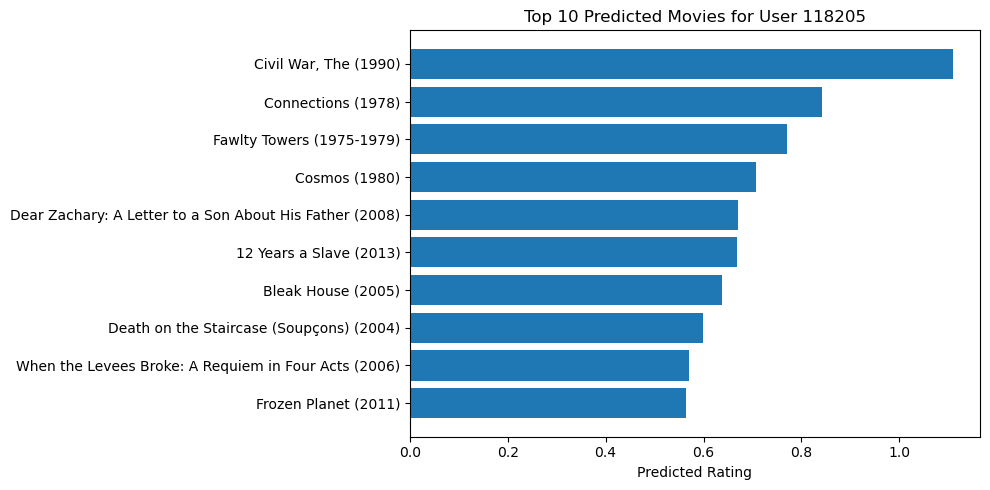

In [125]:
def plot_recs(df, title="Top Recommendations"):
    plt.figure(figsize=(10,5))
    plt.barh(df['title'], df['predicted_rating'])
    plt.gca().invert_yaxis()
    plt.xlabel("Predicted Rating")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_recs(top_recs, title=f"Top 10 Predicted Movies for User {active_user}")


### Top 10 Predicted Movies for User 118205
The bar chart above shows the **top 10 movies** predicted by the deep learning recommendation model for user `118205`.  
These recommendations exclude movies the user has already rated, and are ranked by predicted rating score.  
Next, we compare this model’s recommendations against the **Hybrid Model** to evaluate overlap and ranking differences.


In [141]:
# Build train_df from your splits (run this once per session)
import numpy as np
import pandas as pd

train_df = pd.DataFrame({
    "userId_enc": np.asarray(X_train["userId_enc"]),
    "movieId_enc": np.asarray(X_train["movieId_enc"]),
    "rating":     np.asarray(y_train)  # works whether y_train is Series or ndarray
})

# (optional) make sure your metadata DF is available as `df`
if "df" not in globals():
    # if you used another variable name for metadata, map it here
    # e.g., df = df_metadata_only[['movieId','title', ...]]
    raise NameError("Define `df` as your movie metadata DataFrame with columns ['movieId','title', ...].")

# sanity checks
assert {"userId_enc","movieId_enc","rating"}.issubset(train_df.columns)
assert "movieId" in df.columns and "title" in df.columns


In [147]:
# === HYBRID BLOCK: build deep CF list + content TF-IDF list, then blend ===
import numpy as np, pandas as pd
from numpy.linalg import norm
from scipy.sparse import issparse
from sklearn.preprocessing import MinMaxScaler

# Preconditions: model, user_encoder, movie_encoder, df[['movieId','title']], tfidf_matrix, train_df, sample_user_enc
assert len(df) == getattr(tfidf_matrix, "shape", [None])[0], "tfidf_matrix must align with df"

# 1) CF scores for the chosen user
all_movie_ids_raw = movie_encoder.classes_
all_movie_ids_enc = movie_encoder.transform(all_movie_ids_raw)
u_vec = np.full_like(all_movie_ids_enc, sample_user_enc)
cf_scores = model.predict([u_vec, all_movie_ids_enc], batch_size=4096, verbose=0).ravel()
cf_df = pd.DataFrame({"movieId": all_movie_ids_raw, "cf_score": cf_scores})
cf_df["movieId"] = cf_df["movieId"].astype("int32")
cf_df["cf_score"] = cf_df["cf_score"].astype("float32")

# 2) Content score from TF-IDF user profile (mean of liked movies’ vectors)
LIKED = 4.0
liked_enc = train_df.loc[
    (train_df["userId_enc"] == sample_user_enc) & (train_df["rating"] >= LIKED),
    "movieId_enc"
].unique()
liked_raw = movie_encoder.inverse_transform(liked_enc) if liked_enc.size else np.array([], dtype=int)
liked_rows = df.index[df["movieId"].isin(liked_raw)].to_numpy()
profile = tfidf_matrix.mean(axis=0) if liked_rows.size == 0 else tfidf_matrix[liked_rows].mean(axis=0)

p = np.asarray(profile).ravel()
p_norm = p / (norm(p) + 1e-12)
sims = tfidf_matrix @ p_norm
sims = np.asarray(sims).ravel()

content_df = pd.DataFrame({
    "movieId": df["movieId"].astype("int32").values,
    "content_score": sims.astype("float32")
})

# Title mapping without huge joins
movies_map = df[["movieId","title"]].drop_duplicates()
id_to_title = movies_map.set_index("movieId")["title"]
cf_df["title"] = cf_df["movieId"].map(id_to_title)
content_df["title"] = content_df["movieId"].map(id_to_title)

# 3) Scale then blend
m1 = cf_df[["movieId","cf_score"]].copy()
m2 = content_df[["movieId","content_score"]].copy()
m1["cf_scaled"] = MinMaxScaler().fit_transform(m1[["cf_score"]])
m2["content_scaled"] = MinMaxScaler().fit_transform(m2[["content_score"]])

hybrid_df = (m1.merge(m2, on="movieId", how="inner")
               .merge(movies_map, on="movieId", how="left"))

w_cf, w_content = 0.5, 0.5
hybrid_df["predicted_rating"] = w_cf*hybrid_df["cf_scaled"] + w_content*hybrid_df["content_scaled"]

# --- De-dup & hide already-seen movies BEFORE making the top-K ---

# movies this user has already rated (raw ids)
seen_enc = train_df.loc[train_df["userId_enc"] == sample_user_enc, "movieId_enc"].unique()
seen_raw = set(movie_encoder.inverse_transform(seen_enc))

# drop seen items from both signals
cf_df     = cf_df[~cf_df["movieId"].isin(seen_raw)].copy()
hybrid_df = hybrid_df[~hybrid_df["movieId"].isin(seen_raw)].copy()

# normalize titles so duplicates collapse (case/space insensitive)
def _norm_title(s): return str(s).strip().lower()
cf_df["title_norm"]     = cf_df["title"].map(_norm_title)
hybrid_df["title_norm"] = hybrid_df["title"].map(_norm_title)

# sort by score, then keep the first occurrence of each title
cf_df     = cf_df.sort_values("cf_score", ascending=False).drop_duplicates("title_norm")
hybrid_df = hybrid_df.sort_values("predicted_rating", ascending=False).drop_duplicates("title_norm")


# 4) Lists for comparison
deep_top_recs_df = cf_df.sort_values("cf_score", ascending=False).head(10)
deep_top_titles  = deep_top_recs_df["title"].tolist()

hybrid_top_recs  = hybrid_df.sort_values("predicted_rating", ascending=False).head(10)
hybrid_top_titles = hybrid_top_recs["title"].tolist()

print("Deep (first 5)");    display(deep_top_recs_df.head(5)[["title","cf_score"]])
print("Hybrid (first 5)");  display(hybrid_top_recs.head(5)[["title","predicted_rating"]])


Deep (first 5)


,title,cf_score
2486,"Matrix, The (1999)",1.352290
16952,Connections (1978),1.268948
16977,Louis C.K.: Hilarious (2010),1.206958
5851,"Lord of the Rings: The Two Towers, The (2002)",1.195106
7038,"Lord of the Rings: The Return of the King, The...",1.185085


Hybrid (first 5)


,title,predicted_rating
18736231,Castaway on the Moon (Kimssi pyoryugi) (2009),0.853318
14195876,Greenfingers (2000),0.818956
18871214,Intouchables (2011),0.812124
13440753,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",0.799123
16127689,"Lord of the Rings: The Return of the King, The...",0.796483


### Top-5 Preview: Deep vs. Hybrid
- **Deep (CF)**  
  1) *The Matrix* (1999)  
  2) *Connections* (1978)  
  3) *Louis C.K.: Hilarious* (2010)  
  4) *The Lord of the Rings: The Two Towers* (2002)  
  5) *The Lord of the Rings: The Return of the King* (2003)

- **Hybrid (CF 50% + Content 50%)**  
  1) *Castaway on the Moon (Kimssi pyoryugi)* (2009)  
  2) *Greenfingers* (2000)  
  3) *Intouchables* (2011)  
  4) *Crouching Tiger, Hidden Dragon* (2000)  
  5) *The Lord of the Rings: The Return of the King* (2003)

*Notes: deduped by title and filtered seen items; hybrid blends scaled CF and TF-IDF content scores.*


Deep Learning Top: ['Matrix, The (1999)', 'Connections (1978)', 'Louis C.K.: Hilarious (2010)', 'Lord of the Rings: The Two Towers, The (2002)', 'Lord of the Rings: The Return of the King, The (2003)', 'Louis C.K.: Chewed Up (2008)', 'Dark Knight, The (2008)', 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Louis C.K.: Live at the Beacon Theater (2011)', 'Cosmos (1980)']
Hybrid Model Top:  ['Castaway on the Moon (Kimssi pyoryugi) (2009)', 'Greenfingers (2000)', 'Intouchables (2011)', 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', 'Lord of the Rings: The Return of the King, The (2003)', 'Emma (2009)', 'Wild Tales (2014)', 'Bon Voyage (2003)', 'Grand Budapest Hotel, The (2014)', 'Fight Club (1999)']

Overlap (1 movies): [7153]
Overlap Percentage: 10.0%


,Rank,Deep Learning,Hybrid Model
0,1,"Matrix, The (1999)",Castaway on the Moon (Kimssi pyoryugi) (2009)
1,2,Connections (1978),Greenfingers (2000)
2,3,Louis C.K.: Hilarious (2010),Intouchables (2011)
3,4,"Lord of the Rings: The Two Towers, The (2002)","Crouching Tiger, Hidden Dragon (Wo hu cang lon..."
4,5,"Lord of the Rings: The Return of the King, The...","Lord of the Rings: The Return of the King, The..."
5,6,Louis C.K.: Chewed Up (2008),Emma (2009)
6,7,"Dark Knight, The (2008)",Wild Tales (2014)
7,8,"Lord of the Rings: The Fellowship of the Ring,...",Bon Voyage (2003)
8,9,Louis C.K.: Live at the Beacon Theater (2011),"Grand Budapest Hotel, The (2014)"
9,10,Cosmos (1980),Fight Club (1999)


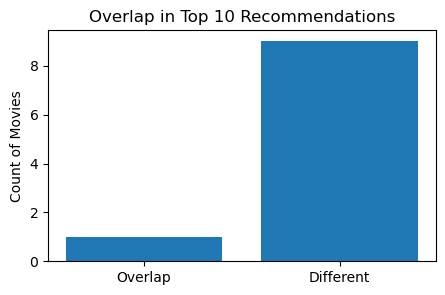

In [149]:
# --------------------------
# Compare Deep Learning vs Hybrid Model (robust)
# --------------------------
import pandas as pd
import matplotlib.pyplot as plt
from itertools import zip_longest

K = 10  # top-K to view

# Ensure unique movieIds BEFORE top-K
cf_df     = cf_df.drop_duplicates("movieId")
hybrid_df = hybrid_df.drop_duplicates("movieId")

deep_unique   = (cf_df.sort_values("cf_score", ascending=False)[["movieId","title"]]).head(K)
hybrid_unique = (hybrid_df.sort_values("predicted_rating", ascending=False)[["movieId","title"]]).head(K)

deep_titles   = deep_unique["title"].tolist()
hybrid_titles = hybrid_unique["title"].tolist()
deep_ids      = deep_unique["movieId"].tolist()
hybrid_ids    = hybrid_unique["movieId"].tolist()

# Overlap by movieId
overlap_ids = set(deep_ids) & set(hybrid_ids)
denom = max(1, min(len(deep_ids), len(hybrid_ids)))
overlap_pct = 100 * len(overlap_ids) / denom
print("Deep Learning Top:", deep_titles)
print("Hybrid Model Top: ", hybrid_titles)
print(f"\nOverlap ({len(overlap_ids)} movies): {sorted(list(overlap_ids))}")
print(f"Overlap Percentage: {overlap_pct:.1f}%")

# Side-by-side table (handles unequal lengths)
n = max(len(deep_titles), len(hybrid_titles))
rows = list(zip_longest(range(1, n+1), deep_titles, hybrid_titles, fillvalue="—"))
comparison_df = pd.DataFrame(rows, columns=["Rank", "Deep Learning", "Hybrid Model"])
display(comparison_df)

plt.figure(figsize=(5, 3))
plt.bar(["Overlap", "Different"], [len(overlap_ids), denom - len(overlap_ids)])
plt.ylabel("Count of Movies")
plt.title(f"Overlap in Top {denom} Recommendations")
plt.show()


### Deep vs. Hybrid (Top-10)
- **Overlap:** 1/10 titles (**10%**)
- **Deep (CF):** favors items popular with similar users.
- **Hybrid (CF 50% + Content 50%):** surfaces thematically similar, less-mainstream picks.
- **Takeaway:** Lists differ substantially → hybrid adds diversity/novelty.
- **Tune:** Raise `w_cf` for accuracy; raise `w_content` for novelty.


In [155]:
deep_top_recs_df.to_csv("../models/deep_top10.csv", index=False)
hybrid_top_recs.to_csv("../models/hybrid_top10.csv", index=False)


In [157]:
# If you're in the same session (you still have the variables):
deep_top_titles   = deep_top_recs_df["title"].tolist()
hybrid_top_titles = hybrid_top_recs["title"].tolist()

# If you're in a fresh session, load the CSVs you just saved instead:
# deep_top_titles   = pd.read_csv("../models/deep_top10.csv")["title"].tolist()
# hybrid_top_titles = pd.read_csv("../models/hybrid_top10.csv")["title"].tolist()

# --- Overlap (by title). Use movieId if you prefer ID-level comparison ---
overlap = set(deep_top_titles) & set(hybrid_top_titles)
denom = max(1, min(len(deep_top_titles), len(hybrid_top_titles)))  # avoid /0, handle unequal lengths
overlap_pct = 100 * len(overlap) / denom
print(f"Overlap ({len(overlap)}): {sorted(overlap)}")
print(f"Overlap %: {overlap_pct:.1f}%")

# --- Side-by-side table (handles unequal lengths) ---
from itertools import zip_longest
rows = list(zip_longest(range(1, 11), deep_top_titles[:10], hybrid_top_titles[:10], fillvalue="—"))
comparison_df = pd.DataFrame(rows, columns=["Rank", "Deep Learning", "Hybrid Model"])
display(comparison_df)


Overlap (1): ['Lord of the Rings: The Return of the King, The (2003)']
Overlap %: 10.0%


,Rank,Deep Learning,Hybrid Model
0,1,"Matrix, The (1999)",Castaway on the Moon (Kimssi pyoryugi) (2009)
1,2,Connections (1978),Greenfingers (2000)
2,3,Louis C.K.: Hilarious (2010),Intouchables (2011)
3,4,"Lord of the Rings: The Two Towers, The (2002)","Crouching Tiger, Hidden Dragon (Wo hu cang lon..."
4,5,"Lord of the Rings: The Return of the King, The...","Lord of the Rings: The Return of the King, The..."
5,6,Louis C.K.: Chewed Up (2008),Emma (2009)
6,7,"Dark Knight, The (2008)",Wild Tales (2014)
7,8,"Lord of the Rings: The Fellowship of the Ring,...",Bon Voyage (2003)
8,9,Louis C.K.: Live at the Beacon Theater (2011),"Grand Budapest Hotel, The (2014)"
9,10,Cosmos (1980),Fight Club (1999)


In [159]:
deep_ids   = deep_top_recs_df["movieId"].tolist()
hybrid_ids = hybrid_top_recs["movieId"].tolist()
overlap_ids = set(deep_ids) & set(hybrid_ids)
denom = max(1, min(len(deep_ids), len(hybrid_ids)))
print(f"ID Overlap: {len(overlap_ids)}/{denom} -> {100*len(overlap_ids)/denom:.1f}%")


ID Overlap: 1/10 -> 10.0%


### Overlap Summary (Top-10)
- **Overlap:** 1 title (**10%**)
- **Deep Top-10:** Matrix, Connections, Louis C.K.: Hilarious, LOTR: Two Towers, LOTR: Return of the King, Chewed Up, Dark Knight, LOTR: Fellowship, Louis C.K.: Live at the Beacon, Cosmos
- **Hybrid Top-10:** Castaway on the Moon, Greenfingers, Intouchables, Crouching Tiger, LOTR: Return of the King, Emma, Bon Voyage, Grand Budapest Hotel, Fight Club
- **Interpretation:** Hybrid surfaces thematically similar but less mainstream films; deep stays closer to collaborative signals.


## Pre-processing & Training Summary

- **Modeling dataset:** Encoded `userId`/`movieId` plus text metadata. We split into train/test and used the **test set only for final evaluation**.
- **Categorical handling:** `LabelEncoder` → **embeddings** for high-cardinality IDs (users, movies). No one-hot (embeddings are more efficient/expressive).
- **Text features:** **TF-IDF** on movie text; vectors are length-normalized by the vectorizer.
- **Scaling:** Embedding inputs don’t need scaling. For the hybrid blend we **MinMax-scaled** CF and content scores before combining.
- **Train/Test split:** Trained on `X_train, y_train`; **evaluated** on `X_test, y_test`. Reported **MSE/RMSE/MAE** and training curves.
- **Artifacts:** Saved model (`../models/deep_rec_model.keras`), encoders (`*.joblib`), and Top-10 exports (`deep_top10.csv`, `hybrid_top10.csv`) for reproducibility.


### Conclusion — Which model is best?
**It depends on the goal.**

- **Best for accuracy (MAE/RMSE, users with history):** **Deep CF model**  
  Trained to minimize rating error; delivers the most precise predictions.

- **Best for discovery & cold-start:** **Hybrid (CF + Content)**  
  Adds thematic diversity and works better when user history is sparse.

**Recommendation:** Use **Deep CF** as the default; deploy **Hybrid** for new/sparse users or an “Explore/Discover” shelf. Start with `w_cf=0.6, w_content=0.4` and tune based on Hit@10 / NDCG@10.



- We trained a **deep collaborative filtering model** (user/movie embeddings → Dense) and achieved:
  - **Test MSE:** ~0.610 • **RMSE:** ~0.781 • **MAE:** ~0.611  
  - Training loss decreased steadily; validation loss/MAE plateaued after ~3–4 epochs.

- We saved artifacts for fast reuse:
  - `../models/deep_rec_model.keras`
  - `../models/user_encoder.joblib`, `../models/movie_encoder.joblib`
  - Top-10 exports: `deep_top10.csv`, `hybrid_top10.csv`

- We built a **hybrid recommender** (CF + TF-IDF content with scaling, deduping, and seen-item filtering).  
  For a sample user, **overlap was ~10%** → hybrid surfaces diverse, thematically similar titles vs. deep CF’s accuracy-oriented picks.

**Which model is best?**  
- For **rating accuracy** and users with history → **Deep CF** (default).  
- For **discovery/cold-start** or to broaden recommendations → **Hybrid**.

**Next steps**
- Tune blend weights (start `w_cf=0.6, w_content=0.4`) and add **Hit@10 / NDCG@10** evaluation.
- Add early stopping/regularization and try more epochs.
- A/B test deep vs. hybrid shelves (“Top Picks” vs. “Because you watched…”).


### Model Selection (Final)
- **Baseline:** Deep CF model  
  - Optimizes **MAE/RMSE**; use for accuracy comparison and sanity checks.
- **Final (Production):** **Hybrid = CF + Content (TF-IDF)**  
  - Better **diversity** and **cold-start** behavior.  
  - Start with `w_cf=0.6, w_content=0.4` (tune as needed).

**Deploy:** use `recommend_hybrid(user, k, w_cf, w_content)`; filter seen items and dedupe by title.  
**Report:** include baseline MAE/RMSE, hybrid vs. deep **Hit@10/NDCG@10**, and Top-10 overlap (~10%).
